In [2]:
import nltk

# Download stopwords quietly and force re-download
nltk.download('stopwords', quiet=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaswi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Stopwords loaded successfully. Example:", list(stop_words)[:10])

Stopwords loaded successfully. Example: ['have', 'itself', 'is', 'before', 'he', "she's", 'again', 'couldn', "haven't", 'not']


In [4]:

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
stop_words = set(stopwords.words('english'))

print("All libraries imported and stopwords loaded successfully!")

All libraries imported and stopwords loaded successfully!


In [6]:

data = pd.read_csv('data/spam.csv', encoding='latin-1')
print("First 5 rows of dataset:\n")
print(data.head())
print("\nColumns in dataset:", data.columns.tolist())
if 'v1' in data.columns and 'v2' in data.columns:
    data = data[['v1','v2']]
    data.columns = ['label', 'message']
print("\nMissing values in each column:\n", data.isnull().sum())
print("\nClass distribution:\n", data['label'].value_counts())

First 5 rows of dataset:

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Columns in dataset: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Missing values in each column:
 label      0
message    0
dtype: int64

Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


In [7]:
# Preprocess text data

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing to all messages
data['clean_message'] = data['message'].apply(preprocess)
print("First 5 cleaned messages:\n")
print(data[['message', 'clean_message']].head())

First 5 cleaned messages:

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though  


In [8]:
# Feature extraction and train-test split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['clean_message'])
y = data['label'].map({'ham': 0, 'spam': 1})

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Feature extraction complete.")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Feature extraction complete.
Training samples: 4457, Test samples: 1115


In [9]:

# Train classifiers and evaluate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Performance:\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n\n")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n\n")
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Linear SVM Performance:\n")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

Naive Bayes Performance:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 30 120]]
Accuracy: 0.9731


Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.95      0.62      0.75       150

    accuracy                           0.94      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.94      0.94      0.94      1115

Accuracy: 0.9444


Linear SVM Performance:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy     

In [10]:

import joblib
import os
os.makedirs('models', exist_ok=True)
joblib.dump(nb, 'models/spam_model.pkl')
joblib.dump(vectorizer, 'models/vectorizer.pkl')

print("Model and vectorizer saved in models/")

Model and vectorizer saved in models/


In [11]:

import os
from sklearn.metrics import classification_report
os.makedirs('reports', exist_ok=True)
nb_report = classification_report(y_test, y_pred_nb)
with open('reports/nb_classification_report.txt', 'w') as f:
    f.write(nb_report)
lr_report = classification_report(y_test, y_pred_lr)
with open('reports/lr_classification_report.txt', 'w') as f:
    f.write(lr_report)
svm_report = classification_report(y_test, y_pred_svm)
with open('reports/svm_classification_report.txt', 'w') as f:
    f.write(svm_report)

print("Classification reports saved in reports/")

Classification reports saved in reports/


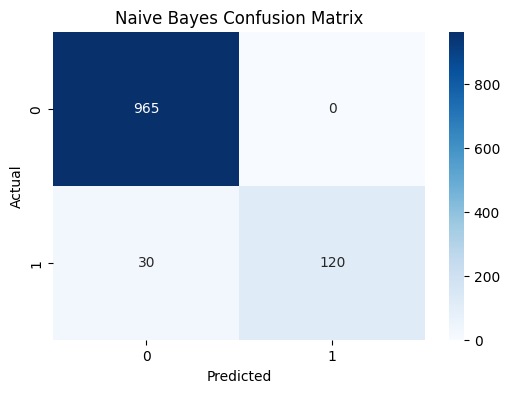

Confusion matrix plot saved in reports/nb_confusion_matrix.png


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('reports/nb_confusion_matrix.png')
plt.show()

print("Confusion matrix plot saved in reports/nb_confusion_matrix.png")

In [1]:
import os 
print(os.getcwd())

C:\Users\yaswi\Desktop\CODSOFT\Task_04_Spam_SMS\notebooks


In [3]:
print(os.listdir(".."))

['.ipynb_checkpoints', 'data', 'models', 'notebooks', 'reports', 'requirements.txt', 'src', 'venv']


In [5]:
print(os.listdir("../models"))


['spam_model.pkl', 'vectorizer.pkl']


In [11]:
import joblib
model = joblib.load("../models/spam_model.pkl")
vectorizer = joblib.load("../models/vectorizer.pkl")
def predict_message(message):
    data = vectorizer.transform([message])
    prediction = model.predict(data)[0]
    return "Spam" if prediction == 1 else "Not Spam"
samples = [
    "Congratulations! You’ve won a $500 gift card. Click here to claim your prize!",
    "Hey, are we still meeting for lunch today?",
    "You have been selected for a free vacation. Reply YES to claim."
]

for text in samples:
    print(f"Message: {text}")
    print(f"Prediction: {predict_message(text)}\n")
    

Message: Congratulations! You’ve won a $500 gift card. Click here to claim your prize!
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Not Spam

Message: You have been selected for a free vacation. Reply YES to claim.
Prediction: Spam



In [12]:
import os
code = """import joblib

# Load the trained model and vectorizer
model = joblib.load("../models/spam_model.pkl")
vectorizer = joblib.load("../models/vectorizer.pkl")

# Function to predict whether a message is spam or not
def predict_message(message):
    data = vectorizer.transform([message])
    prediction = model.predict(data)[0]
    return "Spam" if prediction == 1 else "Not Spam"

if _name_ == "_main_":
    samples = [
        "Congratulations! You’ve won a $500 gift card. Click here to claim your prize!",
        "Hey, are we still meeting for lunch today?",
        "You have been selected for a free vacation. Reply YES to claim."
    ]

    for text in samples:
        print(f"Message: {text}")
        print(f"Prediction: {predict_message(text)}\\n")
"""
os.makedirs("../src", exist_ok=True)
file_path = "../src/spam_detector.py"

with open(file_path, "w") as f:
     f.write(code)

print(f"spam_detector.py saved successfully at: {file_path}")




spam_detector.py saved successfully at: ../src/spam_detector.py


In [15]:
import os 
print (os.getcwd())

C:\Users\yaswi\Desktop\CODSOFT\Task_04_Spam_SMS\notebooks
